## Kaggle

Nós vamos usar uma base de dados do Kaggle chamada [Fraud Detection Example](https://www.kaggle.com/gopalmahadevan/fraud-detection-example) e ela tem uma fração de dados do [PaySim](https://github.com/EdgarLopezPhD/PaySim), um simulador de dados financeiros feito exatamente para detecção de fraude.

**Variáveis do dataset**

**step** - mapeia uma unidade de tempo no mundo real. Neste caso, 1 passo é 1 hora de tempo. Total de etapas 744 (simulação de 30 dias).

**type** - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER. 
(caixa-de-entrada, caixa-de-saida, débito, pagamento e transferência)

**amount** - valor da transação em moeda local.

**nameOrig** - cliente que iniciou a transação

**oldbalanceOrg** - saldo inicial antes da transação

**newbalanceOrig** - novo saldo após a transação

**nameDest** - cliente que é o destinatário da transação

**oldbalanceDest** - destinatário do saldo inicial antes da transação. 
Observe que não há informações para clientes que começam com M (Comerciantes).

**newbalanceDest** - novo destinatário do saldo após a transação. Observe que não há informações para clientes que começam com M (Comerciantes).

**isFraud** - São as transações feitas pelos agentes fraudulentos dentro da simulação. Neste conjunto de dados específico, o comportamento fraudulento dos agentes visa lucrar ao assumir o controle das contas dos clientes e tentar esvaziar os fundos transferindo para outra conta e depois sacando do sistema.

**isFlaggedFraud** - O modelo de negócios visa controlar transferências massivas de uma conta para outra e sinaliza tentativas ilegais. Uma tentativa ilegal neste conjunto de dados é uma tentativa de transferir mais de 200.000 em uma única transação.


## Análise com Pandas

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('../dados/01-classificao-04deteccao-fraude.csv')
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
101608,10,PAYMENT,7477.02,C513257306,785.00,0.00,M524833426,0.00,0.00,0,0
101609,10,CASH_OUT,282252.35,C210473293,220339.29,0.00,C1172042998,95156.01,91286.97,0,0
101610,10,PAYMENT,17289.01,C807582280,0.00,0.00,M334249577,0.00,0.00,0,0
101611,10,TRANSFER,1347146.45,C1315779140,1605.00,0.00,C1631408038,541639.43,2186953.43,0,0


### Trazendo as colunas de fraude para o começo do dataset

In [3]:
df = df[['isFraud',
       'isFlaggedFraud', 'step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest']]
df.head()

,isFraud,isFlaggedFraud,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


### Renomeando as colunas

Criando um dicionário
```
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}
```

In [4]:
colunas = {
    'isFraud': 'fraude',
    'isFlaggedFraud':'super_fraude',
    'step':'tempo',
    'type':'tipo',
    'amount':'valor',
    'nameOrig':'cliente1',
    'oldbalanceOrg':'saldo_inicial_c1',
    'newbalanceOrig':'novo_saldo_c1',
    'nameDest':'cliente2',
    'oldbalanceDest':'saldo_inicial_c2',
    'newbalanceDest':'novo_saldo_c2',
}

In [5]:
df = df.rename(columns = colunas)
df.head()

,fraude,super_fraude,tempo,tipo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2
0,0,0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0
1,0,0,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0
2,1,0,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0
3,1,0,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0
4,0,0,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0


### Outras informações do dataset

In [6]:
df.describe()

,fraude,super_fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2
count,101613.000000,101613.0,101613.000000,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05,1.016130e+05
mean,0.001142,0.0,8.523457,1.740901e+05,9.071753e+05,9.234992e+05,8.810428e+05,1.183998e+06
std,0.033768,0.0,1.820681,3.450199e+05,2.829575e+06,2.867319e+06,2.399949e+06,2.797761e+06
min,0.000000,0.0,1.000000,3.200000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000,0.0,8.000000,1.001659e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000,0.0,9.000000,5.338541e+04,2.019047e+04,0.000000e+00,2.105800e+04,5.178343e+04
75%,0.000000,0.0,10.000000,2.124984e+05,1.947150e+05,2.192178e+05,5.919217e+05,1.063122e+06
max,1.000000,0.0,10.000000,1.000000e+07,3.893942e+07,3.894623e+07,3.400874e+07,3.894623e+07


In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fraude,101613.0,1.141586e-03,3.376824e-02,0.00,0.00,0.00,0.00,1.00
super_fraude,101613.0,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00
tempo,101613.0,8.523457e+00,1.820681e+00,1.00,8.00,9.00,10.00,10.00
valor,101613.0,1.740901e+05,3.450199e+05,0.32,10016.59,53385.41,212498.40,10000000.00
saldo_inicial_c1,101613.0,9.071753e+05,2.829575e+06,0.00,0.00,20190.47,194715.00,38939424.03
novo_saldo_c1,101613.0,9.234992e+05,2.867319e+06,0.00,0.00,0.00,219217.76,38946233.02
saldo_inicial_c2,101613.0,8.810428e+05,2.399949e+06,0.00,0.00,21058.00,591921.70,34008736.98
novo_saldo_c2,101613.0,1.183998e+06,2.797761e+06,0.00,0.00,51783.43,1063121.64,38946233.02


In [8]:
df.shape

(101613, 11)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101613 entries, 0 to 101612
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   fraude            101613 non-null  int64  
 1   super_fraude      101613 non-null  int64  
 2   tempo             101613 non-null  int64  
 3   tipo              101613 non-null  object 
 4   valor             101613 non-null  float64
 5   cliente1          101613 non-null  object 
 6   saldo_inicial_c1  101613 non-null  float64
 7   novo_saldo_c1     101613 non-null  float64
 8   cliente2          101613 non-null  object 
 9   saldo_inicial_c2  101613 non-null  float64
 10  novo_saldo_c2     101613 non-null  float64
dtypes: float64(5), int64(3), object(3)
memory usage: 8.5+ MB


### Verificando a variável target

In [10]:
df.groupby('fraude').tempo.count()

fraude
0    101497
1       116
Name: tempo, dtype: int64

In [11]:
df.isnull().values.any()

False

## Encoding

### Aplicando o Encoding

#### **Tipos de encoding**

**Label Encoding** - Renomea as classes com valores numéricos de 1 a **n**, sendo n o número de classes. Pode existir hierarquia entre as classes.

**One-Hot Encoding** - Transforma as variáveis em **n** colunas binárias, sendo n o número de classes. Todas as classes são analisadas de forma igual, quando tiver a ocorrência dela a coluna terá o valor 1 e quando não o valor 0, isso acontece para as demais colunas criadas.



In [12]:
df = pd.get_dummies(data=df, columns=['tipo'])
df.head()

,fraude,super_fraude,tempo,valor,cliente1,saldo_inicial_c1,novo_saldo_c1,cliente2,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,False,False,False,True,False
1,0,0,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,False,False,False,True,False
2,1,0,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,False,False,False,False,True
3,1,0,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,False,True,False,False,False
4,0,0,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,False,False,False,True,False


#### Removendo variáveis

In [13]:
df = df.drop(['cliente1', 'cliente2', 'super_fraude'], axis = 1)

In [14]:
df.head()

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.64,170136.0,160296.36,0.0,0.0,False,False,False,True,False
1,0,1,1864.28,21249.0,19384.72,0.0,0.0,False,False,False,True,False
2,1,1,181.00,181.0,0.00,0.0,0.0,False,False,False,False,True
3,1,1,181.00,181.0,0.00,21182.0,0.0,False,True,False,False,False
4,0,1,11668.14,41554.0,29885.86,0.0,0.0,False,False,False,True,False


## Regressão Logística

In [15]:
x = df.iloc[:, 1:].values
y = df.iloc[:, 0].values

In [16]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)

lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9989765391276965
Precisão: 0.2
Recall: 0.043478260869565216
F1: 0.07142857142857142


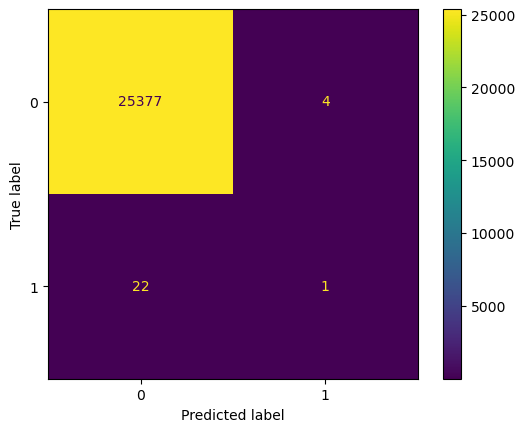

In [18]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import ConfusionMatrixDisplay
%matplotlib inline

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

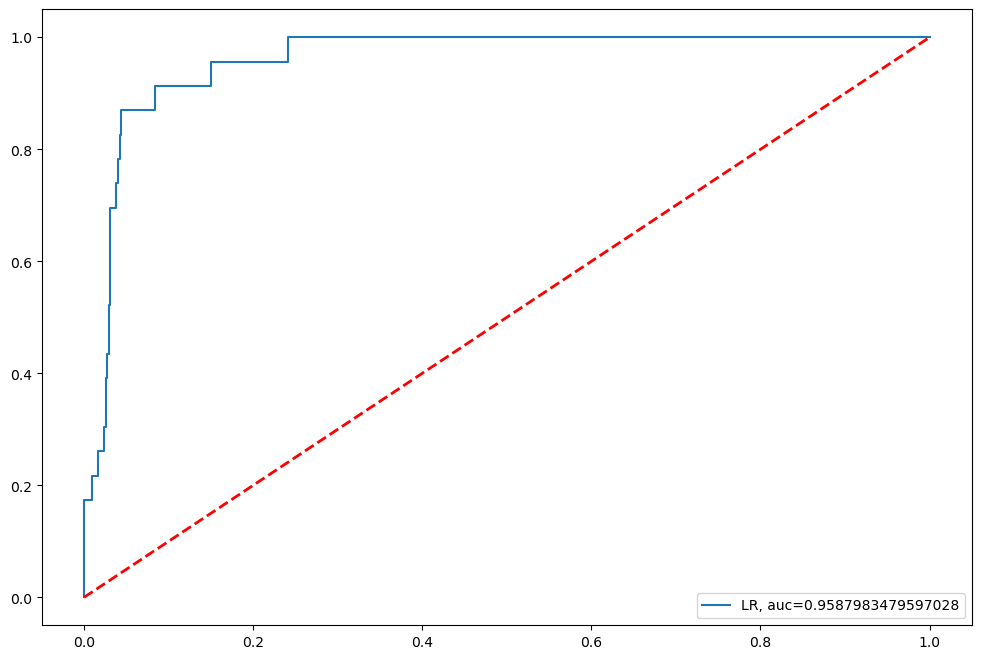

In [19]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4);

## Balanceamento de dados

In [20]:
from imblearn.over_sampling import SMOTE
import numpy as np

SEED=42

smote = SMOTE(random_state=42)

In [21]:
x = df.drop('fraude', axis=1)
y = df['fraude']

In [22]:
x_resampled, y_resampled = smote.fit_resample(x,y)

In [23]:
df_balanced = pd.concat([y_resampled, x_resampled], axis=1)
df_balanced

,fraude,tempo,valor,saldo_inicial_c1,novo_saldo_c1,saldo_inicial_c2,novo_saldo_c2,tipo_CASH_IN,tipo_CASH_OUT,tipo_DEBIT,tipo_PAYMENT,tipo_TRANSFER
0,0,1,9839.640000,170136.000000,160296.36,0.000000,0.000000,False,False,False,True,False
1,0,1,1864.280000,21249.000000,19384.72,0.000000,0.000000,False,False,False,True,False
2,1,1,181.000000,181.000000,0.00,0.000000,0.000000,False,False,False,False,True
3,1,1,181.000000,181.000000,0.00,21182.000000,0.000000,False,True,False,False,False
4,0,1,11668.140000,41554.000000,29885.86,0.000000,0.000000,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
202989,1,5,17608.962863,17608.962863,0.00,0.000000,0.000000,False,False,False,False,True
202990,1,7,12116.291013,12116.291013,0.00,0.000000,0.000000,False,False,False,False,True
202991,1,1,231612.880715,231612.880715,0.00,1945.589357,9370.603471,False,True,False,False,True
202992,1,9,547325.144758,547325.144758,0.00,0.000000,0.000000,False,False,False,False,True


In [24]:
df_balanced.groupby('fraude').tempo.count()

fraude
0    101497
1    101497
Name: tempo, dtype: int64

#### Novo teste do LR

In [25]:
x = df_balanced.iloc[:, 1:].values
y = df_balanced.iloc[:, 0].values

In [26]:
from sklearn.model_selection import train_test_split

SEED = 42

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state = SEED)

In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression(max_iter=1000, random_state=SEED)

lr.fit(x_train, y_train)
y_pred =lr.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9417722516699837
Precisão: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975


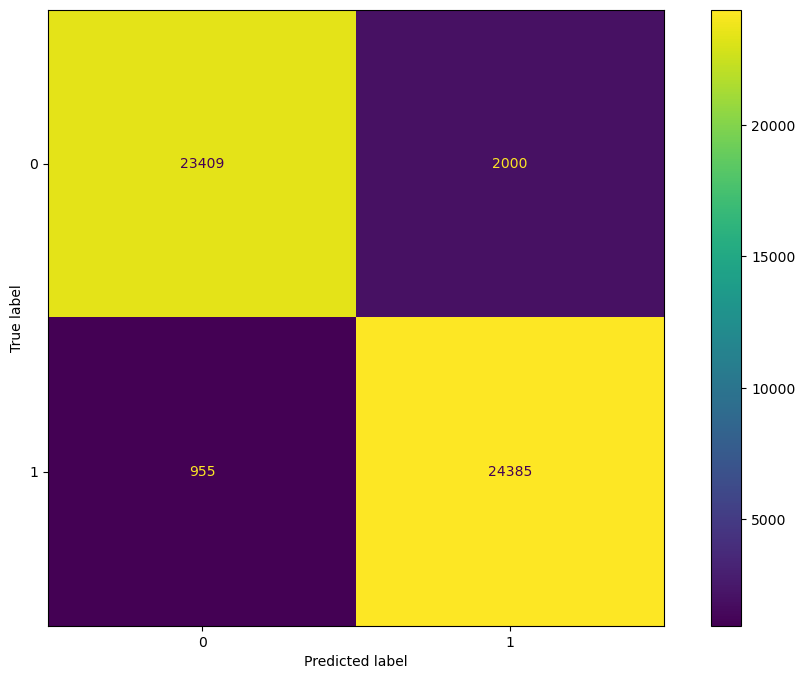

In [28]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();

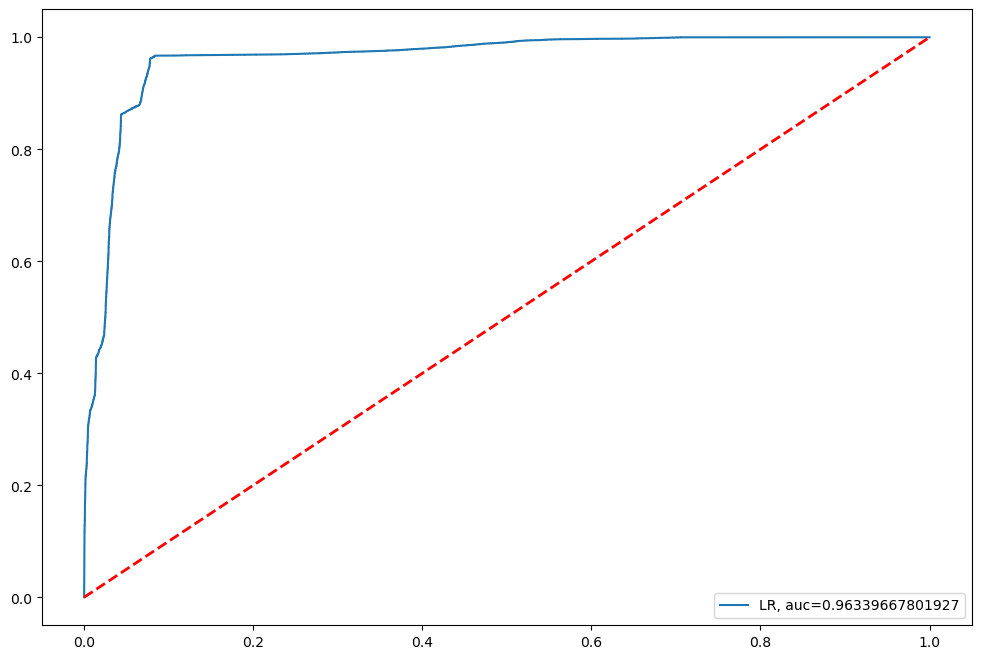

In [29]:
y_pred_proba = lr.predict_proba(x_test)[::, 1]
fpr, tpr, _= metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="LR, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Formulando as hipóteses

**Inserir as hipóteses aqui!** (dê um duplo clique na célula)

- tipo_PAYMENT é o que a pessoa utiliza como padrão e a fraude ocorre por meio do tipo_TRANSFER

- O cliente pode fazer seus pagamentos durante um período do dia, como por exemplo durante a manhã, e a fraude ocorre durante um período diferente, como a madrugada.

- O cliente paga as duas contas no comoeço do mês e houve uma movimentação no final do mês, sendo uma fraude.

## Árvore de Decisão

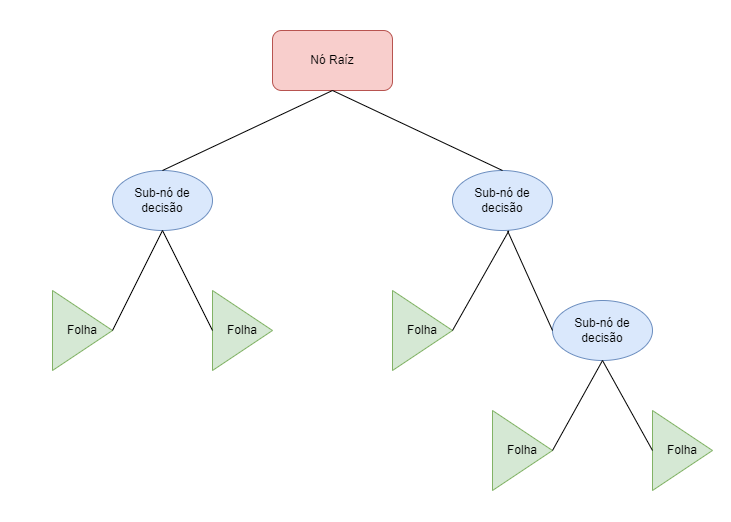

In [30]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt =  DecisionTreeClassifier(max_depth = 5, random_state=SEED)

In [32]:
model = dt.fit(x_train, y_train)
y_pred = dt.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9595065912628821
Precisão: 0.9379678742053192
Recall: 0.9839779005524862
F1: 0.9604221635883906


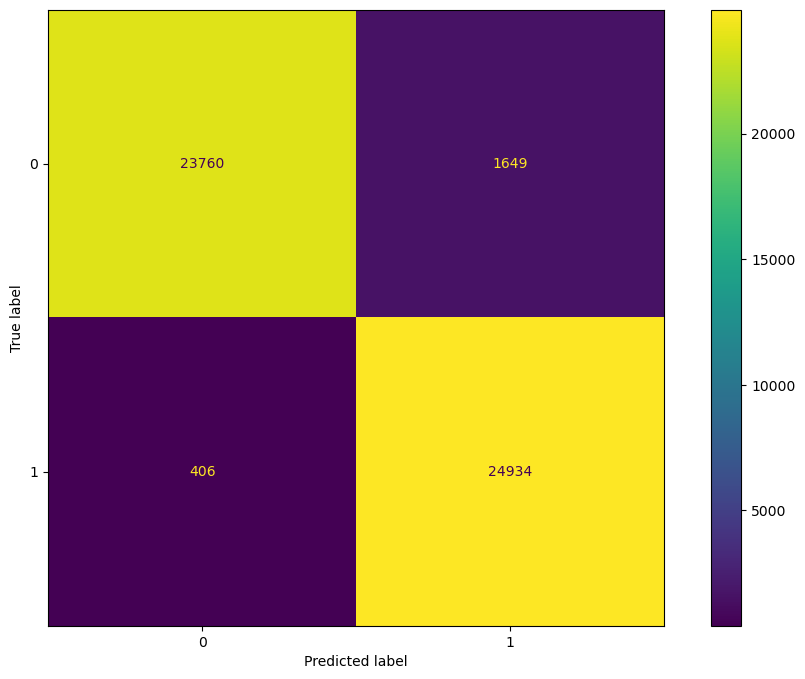

In [33]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

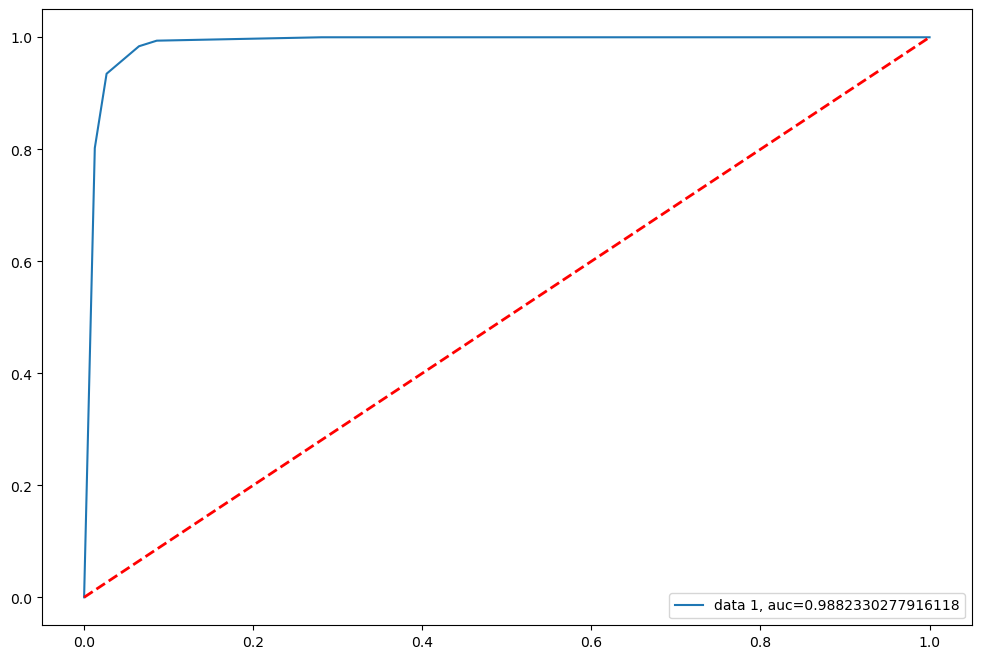

In [34]:
y_pred_proba = dt.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Random Forest

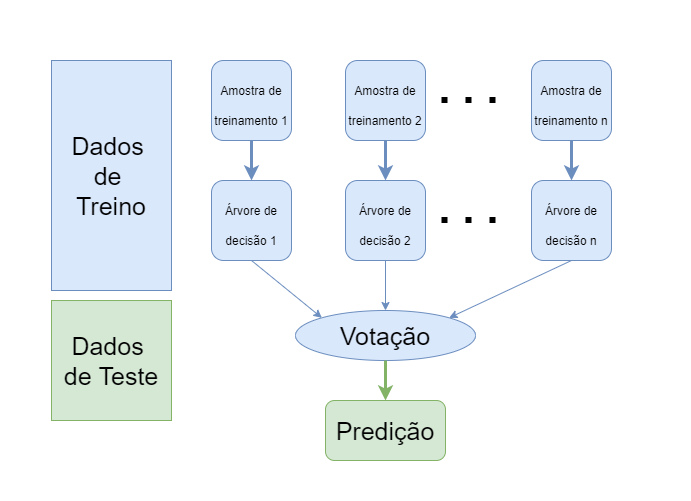

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(max_depth= 5, random_state = SEED)

In [37]:
model = rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)

print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9722950205915387
Precisão: 0.9787182974637971
Recall: 0.9655090765588004
F1: 0.9720688148118718


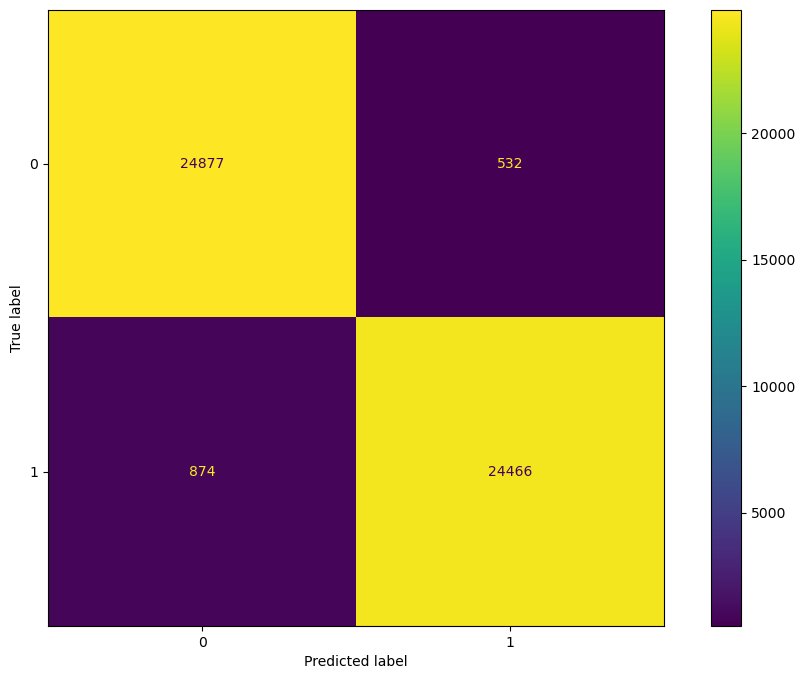

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

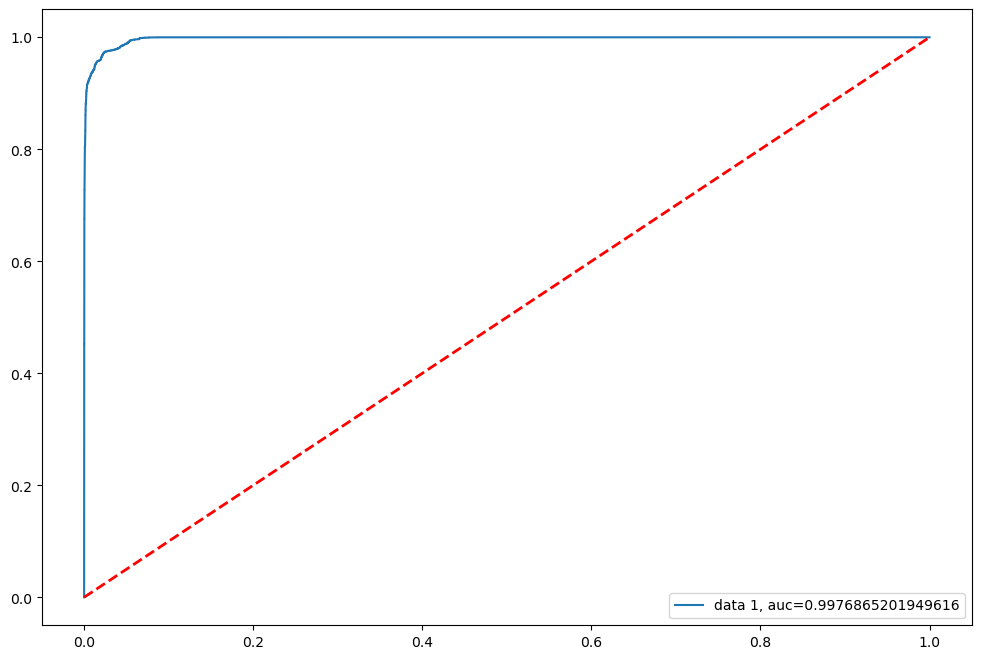

In [39]:
y_pred_proba =  rf.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

plt.rcParams['figure.figsize'] = (12., 8.)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.legend(loc=4)

## Análise de Métricas

In [40]:
classifiers = [
    LogisticRegression(max_iter=1000, random_state=SEED),
    DecisionTreeClassifier(max_depth = 5, random_state=SEED),
    RandomForestClassifier(max_depth= 5, random_state = SEED)]

LogisticRegression
****Resultados****
Accuracy: 0.9417722516699837
Precision: 0.9241993556945234
Recall: 0.9623125493291239
F1: 0.9428709521507975
DecisionTreeClassifier
****Resultados****
Accuracy: 0.9595065912628821
Precision: 0.9379678742053192
Recall: 0.9839779005524862
F1: 0.9604221635883906
RandomForestClassifier
****Resultados****
Accuracy: 0.9722950205915387
Precision: 0.9787182974637971
Recall: 0.9655090765588004
F1: 0.9720688148118718


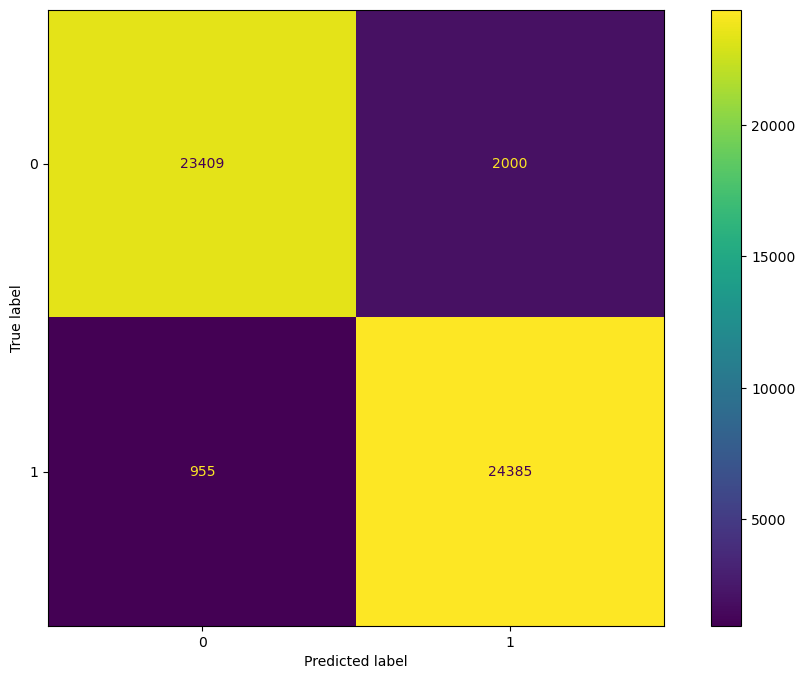

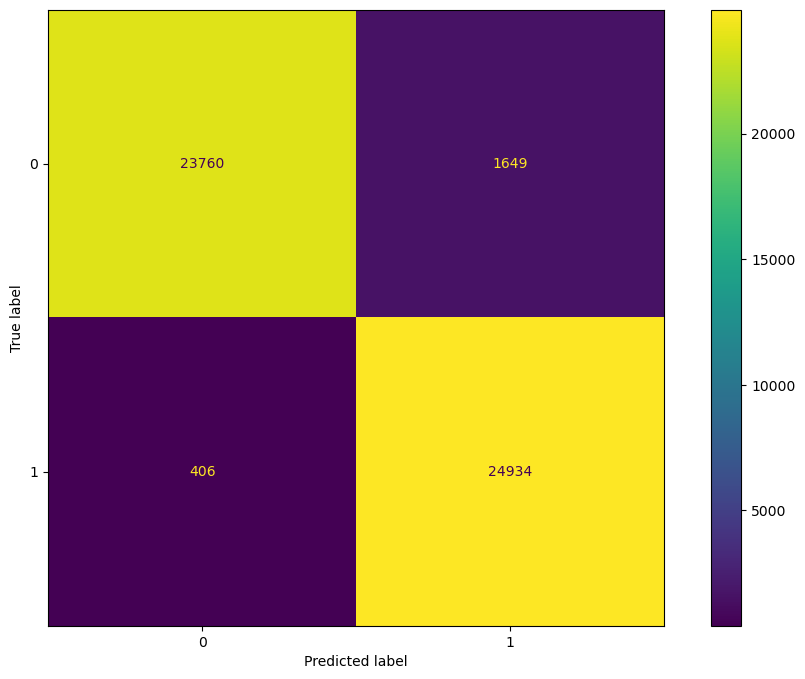

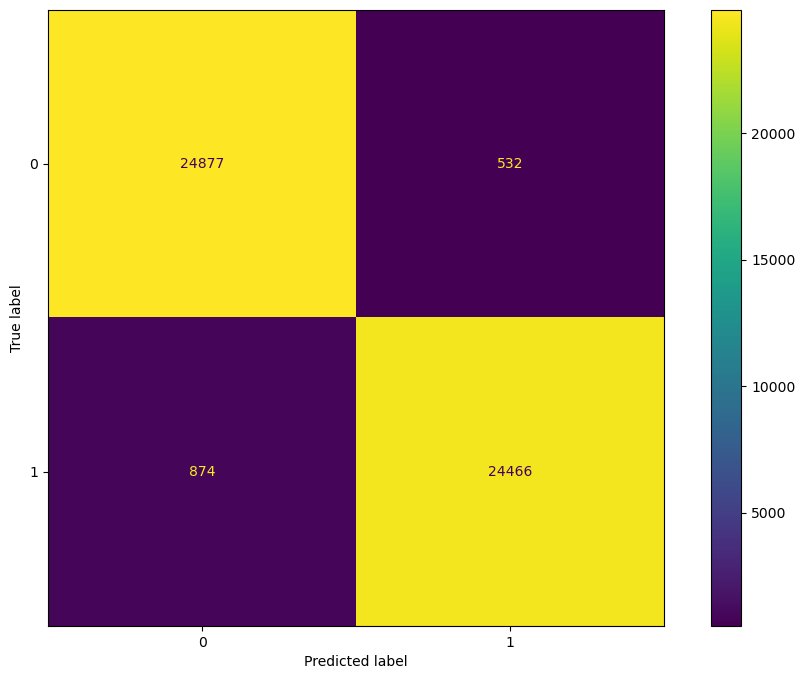

In [41]:
for clf in classifiers:
  clf.fit(x_train, y_train)
  name = clf.__class__.__name__
  print("="*30)
  print(name)
  print('****Resultados****')
  y_pred = clf.predict(x_test)
  print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
  print("Precision:", metrics.precision_score(y_test, y_pred))
  print("Recall:", metrics.recall_score(y_test, y_pred))
  print("F1:", metrics.f1_score(y_test, y_pred))

  cm = confusion_matrix(y_test, y_pred)
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  disp.plot()


Melhorar o modelo [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html) utilizando o método [RandomizedSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html).



## Melhorando o modelo

In [42]:
n_estimators = np.arange(20, 200, step=20)
criterion = ["gini", "entropy"]
max_features = ["auto", "sqrt", "log2"]
max_depth = list(np.arange(2, 10, step=1))
min_samples_split = np.arange(2, 10, step=2)
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

In [43]:
param_grid = {
    "n_estimators": n_estimators,
    "criterion": criterion,
    "max_features": max_features,
    "max_depth": max_depth,
    "min_samples_split": min_samples_split,
    "min_samples_leaf": min_samples_leaf,
    "bootstrap": bootstrap,
}


In [44]:
from sklearn.model_selection import RandomizedSearchCV

SEED = 70

rforest = RandomForestClassifier(random_state=SEED)

In [45]:
random_cv = RandomizedSearchCV(
    rforest, param_grid, n_iter=5, cv=3, scoring="recall", n_jobs=-1, random_state = SEED
)


In [46]:
%%time
rcv = random_cv.fit(x, y)

/home/rafael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/rafael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/home/rafael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is 

CPU times: user 17.5 s, sys: 204 ms, total: 17.7 s
Wall time: 37.8 s


In [47]:
pd.DataFrame(rcv.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,19.655655,0.326434,0.352289,0.020519,120,4,2,auto,9,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.990748,0.999054,0.991724,0.993842,0.003707,1
1,9.765861,0.316674,0.503836,0.028596,120,4,2,auto,2,gini,False,"{'n_estimators': 120, 'min_samples_split': 4, ...",0.914223,0.933083,0.928913,0.925407,0.008089,4
2,9.316860,0.873553,0.233094,0.023548,40,8,1,sqrt,7,entropy,False,"{'n_estimators': 40, 'min_samples_split': 8, '...",0.981379,0.999823,0.972245,0.984482,0.011470,3
3,15.957734,1.725360,0.365765,0.036928,100,8,4,log2,9,entropy,True,"{'n_estimators': 100, 'min_samples_split': 8, ...",0.992374,0.999438,0.988502,0.993438,0.004528,2
4,8.263716,0.580111,0.365236,0.025377,160,6,2,log2,2,gini,False,"{'n_estimators': 160, 'min_samples_split': 6, ...",0.914223,0.929182,0.928913,0.924106,0.006989,5


In [48]:
rcv.best_params_

{'n_estimators': 120,
 'min_samples_split': 4,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 9,
 'criterion': 'gini',
 'bootstrap': False}

In [49]:
rfn = RandomForestClassifier(**rcv.best_params_, random_state = SEED)

model = rfn.fit(x_train, y_train)
y_pred = rfn.predict(x_test)

/home/rafael/anaconda3/lib/python3.11/site-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


In [50]:
print("Acurácia:",metrics.accuracy_score(y_test, y_pred))
print("Precisão:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred)) 
print("F1:",metrics.f1_score(y_test, y_pred))

Acurácia: 0.9917633845001872
Precisão: 0.9907451165721487
Recall: 0.9927782162588792
F1: 0.9917606244579357


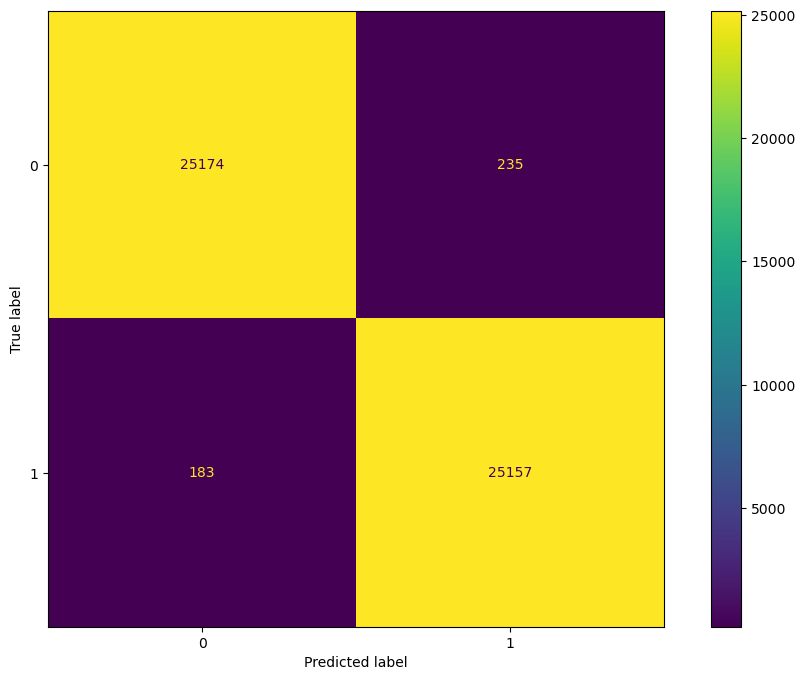

In [51]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot();